In [105]:
import os
import random

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter
from pyvis.network import Network
import networkx as nx
import numpy as np

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 1 月 1 日到 2024 年 5 月 31 日，共包含 2,172 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 2172 筆，無空值。
2. `artComment`: 文章評論，總共 2172 筆，無空值。
3. `artDate`: 文章日期，總共 2172 筆，無空值。
4. `insertedDate`: 插入日期，總共 2172 筆，無空值。
5. `artContent`: 文章內容，總共 2172 筆，無空值。
6. `artCatagory`: 文章類別，總共 2172 筆，無空值。
7. `dataSource`: 資料來源，總共 2172 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 2172 筆，無空值。
9. `artTitle`: 文章標題，總共 2172 筆，無空值。
10. `artUrl`: 文章網址，總共 2172 筆，無空值。

## 記憶體使用情況

- 資料集大小： 186.8+ KB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [33]:
df = pd.read_csv('data/ptt_ai_221130to240531.csv')
df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,[徵才]普匯金融科技-金融科技行銷/金融實習生,2022-02-15 17:29:30,ggglu,Finance,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,2022-02-16 00:12:45,ptt
1,2,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,[新聞]台銀「三駕馬車」戰略發威前4月,2022-05-21 02:29:23,make1302,Finance,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r\n，董...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,2022-05-22 01:11:41,ptt
2,3,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,[新聞]央行徵才月薪最高86K,2023-02-14 11:45:19,kria5304,Finance,https://tinyurl.com/3fcp6ehh\r\n記者陳美君／台北報導\r\n...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,2023-02-15 01:06:37,ptt
3,4,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,[新聞]證交所徵才開創數位驅動時代報名至11/17,2023-10-31 00:48:54,BangBang5566,Finance,證交所徵才開創數位驅動時代 報名至11/17止\r\n\r\n中央社\r\n2023年10月...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,2023-10-31 01:10:55,ptt
4,5,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,[台中][西屯］飛斯戴爾有限公司/日文客服,2022-01-03 07:22:51,howdigh,job,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],125.230.247.67,2022-01-04 00:58:48,ptt


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2172 non-null   int64 
 1   artUrl        2172 non-null   object
 2   artTitle      2172 non-null   object
 3   artDate       2172 non-null   object
 4   artPoster     2172 non-null   object
 5   artCatagory   2172 non-null   object
 6   artContent    2172 non-null   object
 7   artComment    2172 non-null   object
 8   e_ip          2126 non-null   object
 9   insertedDate  2172 non-null   object
 10  dataSource    2172 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.8+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [35]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [36]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artTitle', 'artCatagory', 'dataSource', 'insertedDate']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artUrl,artDate,artPoster,artContent,artComment,e_ip,sentence
0,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,2022-02-15 17:29:30,ggglu,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,【實習】\r，【公司名稱】Influx FinTech 普匯金融科技\r，\r，【工作職缺】...
1,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,2022-05-21 02:29:23,make1302,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r\n，董...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r，，董事...
2,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,2023-02-14 11:45:19,kria5304,https://tinyurl.com/3fcp6ehh\r\n記者陳美君／台北報導\r\n...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,\r，記者陳美君／台北報導\r，2023年2月14日 週二 上午6:32\r，擁抱「金」飯碗...
3,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,2023-10-31 00:48:54,BangBang5566,證交所徵才開創數位驅動時代 報名至11/17止\r\n\r\n中央社\r\n2023年10月...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,證交所徵才開創數位驅動時代 報名至11/17止\r，\r，中央社\r，2023年10月30日...
4,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,2022-01-03 07:22:51,howdigh,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],125.230.247.67,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
5,https://www.ptt.cc/bbs/job/M.1641369547.A.B96....,2022-01-05 15:59:05,cakelover,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],1.160.17.133,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
6,https://www.ptt.cc/bbs/job/M.1642053918.A.308....,2022-01-13 14:05:16,qhorohoro,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],61.220.52.4,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
7,https://www.ptt.cc/bbs/job/M.1642382909.A.5D7....,2022-01-17 09:28:27,catty0310,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],1.162.212.73,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
8,https://www.ptt.cc/bbs/job/M.1642668761.A.F44....,2022-01-20 16:52:39,trpw,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],219.87.87.33,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...
9,https://www.ptt.cc/bbs/job/M.1642761016.A.4BA....,2022-01-21 18:30:13,GhostGrace,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],223.137.115.117,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Deal with Comments 處理留言</div>

In [37]:
tqdm.pandas()

# 處理某篇文章的所有留言（取出留言者與狀態）
def get_comment_info(com):
  commenters,comment_status = [],[]
  com = eval(com)
  for i in com:
    commenters.append(i['cmtPoster'])
    comment_status.append(i['cmtStatus'])
  return pd.Series([commenters, comment_status])

# 將留言者與狀態分開
clear_df[['commenters', 'comment_status']] = clear_df['artComment'].apply(get_comment_info)
clear_df.head()

,artUrl,artDate,artPoster,artContent,artComment,e_ip,sentence,commenters,comment_status
0,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,2022-02-15 17:29:30,ggglu,【實習】\r\n【公司名稱】Influx FinTech 普匯金融科技\r\n\r\n【工作...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""cow38"", ""cmt...",118.168.142.101,【實習】\r，【公司名稱】Influx FinTech 普匯金融科技\r，\r，【工作職缺】...,"[cow38, IKnowWhy, z6112539, blackfire]","[噓, 噓, 噓, 噓]"
1,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,2022-05-21 02:29:23,make1302,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r\n，董...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""DerLuna"", ""c...",118.171.234.47,（中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\r，，董事...,"[DerLuna, TainanBus, whocare96, wekl, poisonB,...","[推, 推, 推, 推, 推, 噓, 推, 推, →, 推, →, 推, 噓, 推, →, ..."
2,https://www.ptt.cc/bbs/Finance/M.1676346325.A....,2023-02-14 11:45:19,kria5304,https://tinyurl.com/3fcp6ehh\r\n記者陳美君／台北報導\r\n...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""fill725258"",...",36.224.200.45,\r，記者陳美君／台北報導\r，2023年2月14日 週二 上午6:32\r，擁抱「金」飯碗...,"[fill725258, junkuo, lolicum, Kydland, BernieW...","[噓, 推, 推, 推, 推, 推, →, 推, 推]"
3,https://www.ptt.cc/bbs/Finance/M.1698684536.A....,2023-10-31 00:48:54,BangBang5566,證交所徵才開創數位驅動時代 報名至11/17止\r\n\r\n中央社\r\n2023年10月...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Laviathan"", ...",42.70.143.5,證交所徵才開創數位驅動時代 報名至11/17止\r，\r，中央社\r，2023年10月30日...,"[Laviathan, cuteman0725, flybydance, Laviathan...","[推, 推, 推, 推, 推, 推, 推, →, 推, 噓, 推, 推, 推, →, 推, ..."
4,https://www.ptt.cc/bbs/job/M.1641165773.A.E67....,2022-01-03 07:22:51,howdigh,job版禁止張貼違反「\r\n就業服務法\r\n」、\r\n「\r\n性別平等工作法\r\n...,[],125.230.247.67,job版禁止張貼違反「\r，就業服務法\r，」、\r，「\r，性別平等工作法\r，」、\r，...,[],[]


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Explode the DataFrame 展開資料</div>

In [38]:
# 展開留言者與狀態
clear_df = clear_df.explode(['commenters', 'comment_status'])

social_df = clear_df[['artPoster','artUrl','commenters','comment_status']]

social_df.head()

,artPoster,artUrl,commenters,comment_status
0,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,cow38,噓
0,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,IKnowWhy,噓
0,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,z6112539,噓
0,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A....,blackfire,噓
1,make1302,https://www.ptt.cc/bbs/Finance/M.1653071365.A....,DerLuna,推


In [39]:
social_df['comment_status'].value_counts()

comment_status
推    63199
→    53625
噓    10843
Name: count, dtype: int64

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Network Analysis Of Users and Articles 使用者與文章的網路分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Filter the Data 篩選資料</div>

In [42]:
def get_top_users(modify_df, n=30):
    user_count = Counter(modify_df['artPoster'].tolist() + modify_df['commenters'].tolist())
    top_users = {user for user, count in user_count.most_common(n)}
    return modify_df[modify_df['artPoster'].isin(top_users) & modify_df['commenters'].isin(top_users)]

# Filter edges to include only interactions between top users
top_filtered_df = get_top_users(social_df, n=30)

top_filtered_df.head()

,artPoster,artUrl,commenters,comment_status
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Transform the Data 轉換資料</div>

In [43]:
# 留言者對文章，狀態為 weight
re_df = top_filtered_df[['commenters','artUrl','comment_status']].rename(columns = {'commenters':'src','artUrl':'dis','comment_status':'weight'})
re_df = re_df[~re_df['src'].isna()]
re_df.head()

,src,dis,weight
166,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,→
166,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,→
166,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,→
166,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,→
166,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,→


In [44]:
def convert_status(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
  
re_df['weight'] = re_df['weight'].map(convert_status)

# 計算某位留言者對某篇文章的總分數
re_df = re_df.groupby(['src','dis']).sum().reset_index()
re_df

,src,dis,weight
0,Cartier,https://www.ptt.cc/bbs/Stock/M.1689924118.A.D9...,2
1,DamnDre,https://www.ptt.cc/bbs/Stock/M.1705162613.A.94...,2
2,DamnDre,https://www.ptt.cc/bbs/Stock/M.1705765005.A.5C...,-1
3,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,5
4,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1686219286.A...,11
...,...,...,...
272,xephon,https://www.ptt.cc/bbs/Stock/M.1714179479.A.DD...,1
273,xephon,https://www.ptt.cc/bbs/Stock/M.1716983131.A.BD...,3
274,yakimochi,https://www.ptt.cc/bbs/Stock/M.1690883012.A.16...,2
275,yakimochi,https://www.ptt.cc/bbs/Stock/M.1695649551.A.97...,1


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Create the Network for users and articles 建立使用者與文章的網路</div>

In [45]:
# 設定分數低的為紅色
def get_color(w):
  if w>0:
    return 'green'
  else:
    return 'red'
  
re_df['color'] = re_df.weight.map(get_color)
re_df

,src,dis,weight,color
0,Cartier,https://www.ptt.cc/bbs/Stock/M.1689924118.A.D9...,2,green
1,DamnDre,https://www.ptt.cc/bbs/Stock/M.1705162613.A.94...,2,green
2,DamnDre,https://www.ptt.cc/bbs/Stock/M.1705765005.A.5C...,-1,red
3,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,5,green
4,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1686219286.A...,11,green
...,...,...,...,...
272,xephon,https://www.ptt.cc/bbs/Stock/M.1714179479.A.DD...,1,green
273,xephon,https://www.ptt.cc/bbs/Stock/M.1716983131.A.BD...,3,green
274,yakimochi,https://www.ptt.cc/bbs/Stock/M.1690883012.A.16...,2,green
275,yakimochi,https://www.ptt.cc/bbs/Stock/M.1695649551.A.97...,1,green


In [46]:
# 發文者對文章
po_df = top_filtered_df[['artPoster', 'artUrl']].rename(columns={'artPoster': 'src', 'artUrl': 'dis'}).drop_duplicates()

In [47]:
# 人為綠色節點 po文為橘色節點

# 建立一個網路圖
netWork = Network(notebook=True, cdn_resources='in_line', directed=True)

# 所有發文者＋留言者
person = list(set(po_df.src.unique().tolist() + re_df.src.unique().tolist()))
url = po_df.dis.unique().tolist()

# 加入節點（人）
netWork.add_nodes(
    nodes=person,
    value=[1 for i in range(len(person))],
    color=['#66CDAA' for i in range(len(person))],
    title=person
)

# 加入節點（文章）
netWork.add_nodes(
    nodes=url,
    value=[2 for i in range(len(url))],
    color=['#FFB366' for i in range(len(url))],
    title=url
)

# 加入邊（發文者 -> 文章）
for i in po_df.to_numpy():
    netWork.add_edge(i[0], i[1], width=2, color='grey')
# 加入邊（留言者 -> 文章），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
for i in re_df.to_numpy():
    netWork.add_edge(i[0], i[1], width=2, color=i[3])

# 設定layout，圖節點之間的斥力
netWork.repulsion()

if not os.path.exists('plot'):
    os.makedirs('plot')

netWork.show('plot/Network.html')

plot/Network.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Interaction within Users 使用者之間的互動</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Select the Top Users 選擇前幾名使用者</div>

In [80]:
pos_comment = get_top_users(social_df, n=100)
pos_comment = pos_comment[~pos_comment['commenters'].isna()]
pos_comment.head(10)

,artPoster,artUrl,commenters,comment_status
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,DrTech,→
166,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A...,keel90135,→
174,sxy67230,https://www.ptt.cc/bbs/Soft_Job/M.1668259766.A...,strlen,→
174,sxy67230,https://www.ptt.cc/bbs/Soft_Job/M.1668259766.A...,strlen,→
196,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1686219286.A...,DrTech,→
196,DrTech,https://www.ptt.cc/bbs/Soft_Job/M.1686219286.A...,DrTech,→


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the score 計算分數</div>

In [81]:
pos_comment['score'] = pos_comment['comment_status'].apply(lambda r: convert_status(r))

# 某留言者對某發文者的總分
pos_comment = pos_comment.groupby(['commenters', 'artPoster']).sum('score').reset_index()
pos_comment = pos_comment[pos_comment.score >= 0]
pos_comment = pos_comment[pos_comment['commenters'] != pos_comment.artPoster]

pos_comment

,commenters,artPoster,score
0,Cartier,yakimochi,2
1,DDDDRR,DrowningPool,8
2,DDDDRR,IzumiKonata,7
3,DDDDRR,Lime5566,2
4,DDDDRR,addy7533967,8
...,...,...,...
1023,yunf,qwe22992168,6
1024,yunf,stpiknow,17
1025,yunf,strlen,2
1026,yunf,sxy67230,5


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Create the Interaction Matrix 建立互動矩陣</div>

In [82]:
matrix = pd.pivot_table(pos_comment, index='commenters', columns='artPoster', values='score').fillna(0)
matrix.head()

artPoster,AAAB,Angels5566,Cartier,DDDDRR,DamnDre,DrTech,DrowningPool,GivemeApen,GuanLaoBan,IzumiKonata,...,sxy67230,thinksilver,troy30408,wen9008,winall,xa9277178,xephon,yakimochi,ynlin1996,yogo3388
commenters,,,,,,,,,,,,,,,,,,,,,
Cartier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
DDDDRR,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,0.0,0.0
DamnDre,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DrTech,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
DrowningPool,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# 所有留言者與發文者
pers = np.unique(pos_comment[['commenters', 'artPoster']])

# 建立評分矩陣（留言者對發文者分數）
# 取得所有人對於其他人的分數（有方向性）
# 矩陣中的值 mat[i][j] 代表使用者 pers[i]（留言者）對使用者 pers[j]（發文者）的評分，
# 留言者和發文者之間的關係是有方向的（即，mat[i][j] 不一定等於 mat[j][i]）
matrix = pd.pivot_table(pos_comment, index='commenters', columns='artPoster', values='score').fillna(0) \
    .reindex(columns=pers, index=pers, fill_value=0).to_numpy()
matrix.shape

(100, 100)

In [89]:
# 取得所有人與其他人互動分數總和（無方向，兩個方向分數相加）
# 矩陣中的每一對元素都對稱，即 mat_s[i][j] 等於 mat_s[j][i]
# 對稱矩陣中的值 mat_s[i][j] 表示使用者 pers[i] 與使用者 pers[j] 之間的互動總分。
# 透過將 pers[i] 對 pers[j] 的評分和 pers[j] 對 pers[i] 的評分相加而得到的。
# np.tril(mat, -1): 生成一個下三角矩陣（包括主對角線下方的所有元素，但不包括主對角線上的元素）
# np.triu(mat, 1): 生成一個上三角矩陣（包括主對角線上方的所有元素，但不包括主對角線上的元素）
tri = (np.tril(matrix, -1).T + np.triu(matrix, 1))
matrix_sum = tri + tri.T  # 上三角和下三角都包括在內，但對角線是 0
matrix_sum

array([[ 0.,  0.,  0., ...,  0.,  0.,  8.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 16.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  1.,  0., ..., 16.,  0.,  0.]])

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Interaction Matrix 可視化互動矩陣</div>

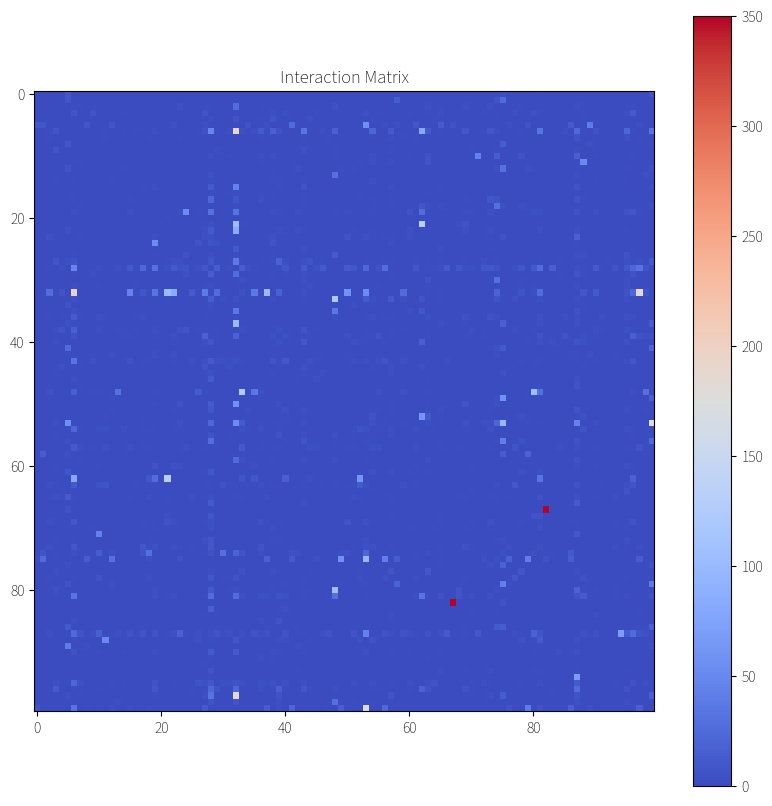

In [90]:
plt.figure(figsize=(10, 10))

plt.imshow(matrix_sum, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Interaction Matrix')
plt.show()

可見有少部分兩兩之間的互動有很高的分數，這些人之間的互動可能比較密切。

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Network of Users and Articles 可視化使用者與文章的網路</div>

In [102]:
# 產生隨機的顏色，畫圖使用
def random_color():
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(), r(), r())


def mat_present_graph(
    mat: np.array,
    node_id: list,
    node_type: list = None,
    node_value: list = None,
    directed=True,
    edge_color=None,
    scale=1
) -> Network:
    # 有方向或無方向
    if not directed:
        # 矩陣對稱
        if (mat == mat.transpose()).all():
            print('matrix is Symmetric')
        # 矩陣不對稱
        else:
            print('matrix is not Symmetric')

    # 設定節點的類別及顏色
    # 沒有分節點類別
    if node_type is None:
        c = random_color()
        node_colors = [c for i in range(len(node_id))]
        node_type = [" " for i in range(len(node_id))]
    # 有分節點類別
    else:
        node_color_map = {}
        for i in set(node_type):
            # 幫每個類別產生一個顏色
            while True:
                c = random_color()
                if c not in node_color_map.values():
                    break
            node_color_map[i] = c
        node_colors = [node_color_map[i] for i in node_type]

    # 如果沒有給邊的顏色，隨機產生一個
    if edge_color is None:
        edge_color = random_color()

    # 如果沒有給 node 值，就都分配 1
    if node_value is None:
        node_value = [1 for i in range(len(node_id))]

    # 建立圖
    net = Network(notebook=True, directed=directed, cdn_resources='in_line')

    titles_list = []
    for i, j in zip(node_id, node_type):
        titles_list.append(str(i) + ":" + str(j))

    net.add_nodes(
        nodes=node_id,
        value=node_value,
        label=node_id,
        title=titles_list,
        color=node_colors
    )

    for row in range(len(node_id)):
        for col in range(len(node_id)):
            if mat[row][col] > 0.:
                net.add_edge(
                    node_id[row], node_id[col], width=mat[row][col] / scale, color=edge_color, title=mat[row][col]
                )
    net.repulsion()
    return net

In [103]:
# 定義發文者（po）、評論者(cmt)、兩者兼具(both)
node_type = []

cmt_list = pos_comment['commenters'].unique().tolist()
po_list = pos_comment['artPoster'].unique().tolist()
both_list = list(set(cmt_list) & set(po_list))

for p in pers:
  if p in both_list:
    node_type.append('both')

  elif p in cmt_list:
    node_type.append('cmt')

  elif p in po_list:
    node_type.append('po')

In [104]:
# 繪製網路圖
net = mat_present_graph(matrix_sum, pers, node_type=node_type, directed=False, edge_color='grey', scale=10)

net.show('plot/Network2.html')

matrix is Symmetric
plot/Network2.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: Eigenvector Centrality 特徵向量中心性</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Eigenvector Centrality 計算特徵向量中心性</div>

In [106]:
# nx.Graph(mat_s): 將對稱矩陣 mat_s 轉換為 NetworkX 的無向圖對象
# nx.eigenvector_centrality: 計算圖中每個節點的特徵向量中心性
# max_iter=10000: 演算法的最大迭代次數，以確保演算法收斂。 特徵向量中心性的計算是一個迭代過程，可能需要多次迭代才能達到穩定狀態。
eigen_vector = np.array(list(nx.eigenvector_centrality(nx.Graph(matrix_sum), max_iter = 10000).values()))

# 將特徵向量中心性值歸一化到 [0, 1] 範圍內
eigen_vector = (eigen_vector - np.min(eigen_vector)) / (np.max(eigen_vector) - np.min(eigen_vector))

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Eigenvector Centrality 可視化特徵向量中心性</div>

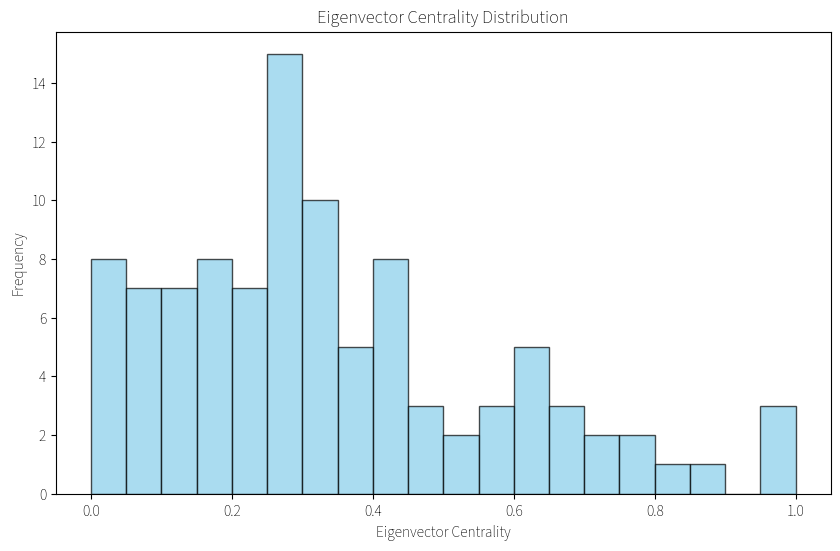

In [111]:
# 繪製特徵向量中心性的直方圖
plt.figure(figsize=(10, 6))
plt.hist(eigen_vector, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Assign the Value to the Nodes 將值分配給節點</div>

In [107]:
node_value = []
q = np.quantile(eigen_vector, [.2,.4,.6,.8])

for i in eigen_vector:
  # 越重要分數越高
  if i > q[3]:
    node_value.append(25)
  elif i >q[2]:
    node_value.append(20)
  elif i>q[1]:
    node_value.append(15)
  elif i>q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Network of Users and Articles with Eigenvector Centrality 可視化使用者之間的網路與特徵向量中心性</div>

In [109]:
net = mat_present_graph(mat = matrix_sum,node_id = pers,node_type = node_type,node_value = node_value,directed=False, scale=10)
net.show('plot/Network3.html')

matrix is Symmetric
plot/Network3.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: PageRank Algorithm PageRank 演算法</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the PageRank 計算 PageRank</div>

In [113]:
# Digraph 設定有向圖
# nx.DiGraph(mat): 使用 NetworkX 的 DiGraph 類別將矩陣 mat 轉換為有向圖物件。
# nx.pagerank(): 計算圖中每個節點的 PageRank 值
pagerank = np.array(list(nx.pagerank(nx.DiGraph(matrix)).values()))

array([0.00476838, 0.00978762, 0.01263152, 0.00450614, 0.00855313,
       0.00331967, 0.07559493, 0.00450166, 0.00512239, 0.01477836,
       0.0206031 , 0.01917743, 0.01338452, 0.00665639, 0.01103826,
       0.0093883 , 0.01101814, 0.01200588, 0.00956274, 0.03032082,
       0.00331063, 0.01070222, 0.01829514, 0.00575565, 0.0033215 ,
       0.00444092, 0.0061983 , 0.01464369, 0.00327279, 0.02443487,
       0.0064658 , 0.00626933, 0.00327279, 0.00687952, 0.00444873,
       0.00846172, 0.00369526, 0.01253215, 0.00689134, 0.00576733,
       0.01252298, 0.00417343, 0.00669537, 0.02971171, 0.01777415,
       0.00432952, 0.00717964, 0.00439758, 0.00327279, 0.00514522,
       0.00639652, 0.00730046, 0.00904441, 0.02608453, 0.00640302,
       0.00538999, 0.03017095, 0.00902089, 0.01053182, 0.00510261,
       0.02978365, 0.00607936, 0.00327279, 0.00449703, 0.00406008,
       0.00520513, 0.00430142, 0.00327279, 0.00535162, 0.00694684,
       0.00649511, 0.00403867, 0.01177268, 0.00568855, 0.00897

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the PageRank 可視化 PageRank</div>

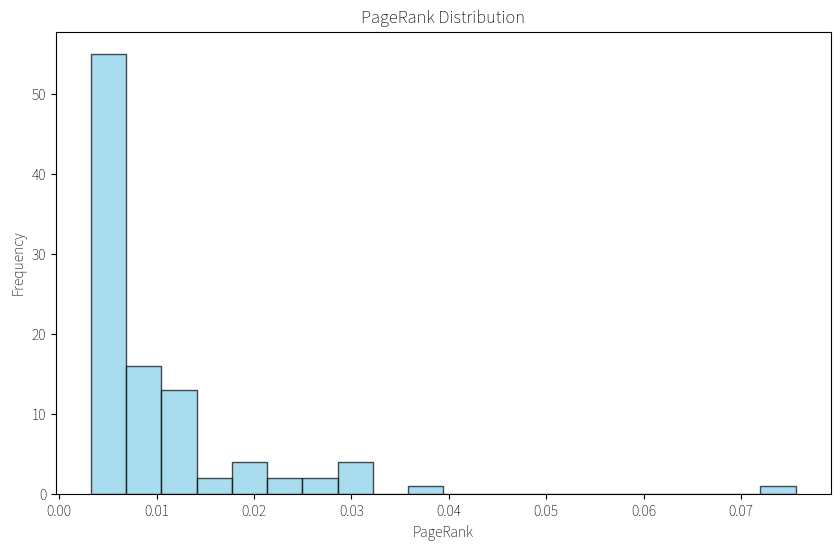

In [114]:
# 繪製 PageRank 的直方圖
plt.figure(figsize=(10, 6))
plt.hist(pagerank, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('PageRank Distribution')
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.show()

In [116]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=(pagerank * 1000).tolist(), scale=10)

net.show('plot/Network4.html')

plot/Network4.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 7: Hit Score</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Hit Score 計算 Hit Score</div>

In [117]:
# nx.hits 計算圖中每個節點的 Hub 和 Authority 值。 HITS 演算法將每個節點分為兩種角色：
# Hub： 一個好的 Hub 節點連結到許多 Authority 節點。
# Authority： 一個好的 Authority 節點被許多 Hub 節點連結到。

# out_：每個節點的 Hub 值。
# in_：每個節點的 Authority 值。

out_, in_ = nx.hits(nx.DiGraph(matrix), max_iter=100)

In [118]:
out_ = np.array(list(out_.values()))
out_q = np.quantile(out_,[.2,.4,.6,.8])
out_q

array([-0.        ,  0.00022324,  0.00156527,  0.0087416 ])

In [119]:
in_ = np.array(list(in_.values()))
in_q = np.quantile(in_, [.2, .4, .6, .8])
in_q

array([0.00066012, 0.00144444, 0.0030027 , 0.01129364])

In [122]:
node_value_out = []

# 根據 Hub 值設定節點大小
for i in out_:
  if i > out_q[3]:
    node_value_out.append(25)
  elif i >out_q[2]:
    node_value_out.append(20)
  elif i>out_q[1]:
    node_value_out.append(15)
  elif i>out_q[0]:
    node_value_out.append(10)
  else:
    node_value_out.append(5)

In [123]:
node_value_in = []

# 根據 Authority 值設定節點大小
for i in in_:
  if i > in_q[3]:
    node_value_in.append(25)
  elif i >in_q[2]:
    node_value_in.append(20)
  elif i>in_q[1]:
    node_value_in.append(15)
  elif i>in_q[0]:
    node_value_in.append(10)
  else:
    node_value_in.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Out Score 可視化 Out Score</div>

In [124]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=node_value_out, scale=10)

net.show('plot/Network5.html')

plot/Network5.html


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the In Score 可視化 In Score</div>

In [125]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=node_value_in, scale=10)

net.show('plot/Network6.html')

plot/Network6.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 8: Betweenness Centrality</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Betweenness Centrality 計算 Betweenness Centrality</div>

In [126]:
bet = np.array(list(nx.betweenness_centrality(nx.Graph(matrix_sum)).values()))
bet = (bet-np.min(bet))/(np.max(bet)-np.min(bet))
bet_q = np.quantile(bet,[.2,.4,.6,.8])

In [127]:
node_value = []

for i in bet:
  if i > bet_q[3]:
    node_value.append(25)
  elif i > bet_q[2]:
    node_value.append(20)
  elif i>bet_q[1]:
    node_value.append(15)
  elif i>bet_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Betweenness Centrality 可視化 Betweenness Centrality</div>

In [128]:
net = mat_present_graph(mat=matrix_sum, node_id=pers, node_type=node_type, directed=False,node_value=node_value, scale=10)

net.show('plot/Network7.html')

matrix is Symmetric
plot/Network7.html


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 9: Calculate the Largest Subgraph 計算最大子圖</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Largest Subgraph 計算最大子圖</div>

In [129]:
# 計算max subgraph
G = nx.Graph(matrix_sum)
G_sub = sorted(nx.connected_components(G), key=len, reverse=True)
G_max_sub = G.subgraph(G_sub[0])

# 重新定義 mat
sub_matrix = nx.adjacency_matrix(G_max_sub).todense()
node_idx = list(G_max_sub.nodes)
sub_pers = pers[node_idx]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Largest Subgraph 可視化最大子圖</div>

In [131]:
net = mat_present_graph(mat=sub_matrix, node_id=sub_pers, directed=False, scale=10)

net.show('plot/Network8.html')

matrix is Symmetric
plot/Network8.html


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Transitivity 計算圖的聚集性</div>

In [135]:
nx.transitivity(nx.Graph(sub_matrix))

0.3190269600247908

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Density 計算密度</div>

In [136]:
nx.density(nx.Graph(sub_matrix))

0.16565656565656567

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Average Clustering Coefficient 計算平均聚集係數</div>

In [137]:
nx.average_clustering(nx.Graph(sub_matrix))

0.37630358149190035

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Distance 計算距離</div>

In [139]:
nx.average_shortest_path_length(nx.Graph(sub_matrix))

2.002222222222222

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Diameter 計算直徑</div>

In [140]:
nx.diameter(nx.Graph(sub_matrix))

4

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Clustering 計算聚集性</div>

In [142]:
nx.average_clustering(nx.Graph(sub_matrix))

0.37630358149190035

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 10: Conclusion 結論</div>